In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
amazon_df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [45]:
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [46]:
#PART 1
#1. Crosstab Analysis:

#Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(amazon_df['category'], amazon_df['isBestSeller'])
crosstab_result
crosstab_result_ratio =crosstab_result.copy()
crosstab_result_ratio["Ratio"] = crosstab_result[True] / crosstab_result.sum(axis=1)
crosstab_ordered = crosstab_result_ratio.sort_values(by="Ratio", ascending=False)
crosstab_ordered
#Are there categories where being a best-seller is more prevalent?
#Yes for example grocery (taking into account best seller ratio has more prevalence)

isBestSeller,False,True,Ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [47]:
#2. Statistical Tests:
from scipy.stats import chi2_contingency

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value
#As p_value <0,05 we can say they are no independent and there is a significant association

(np.float64(36540.20270061387), np.float64(0.0))

In [48]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
crosstab_result_int = crosstab_result.astype(int)
association(crosstab_result_int, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

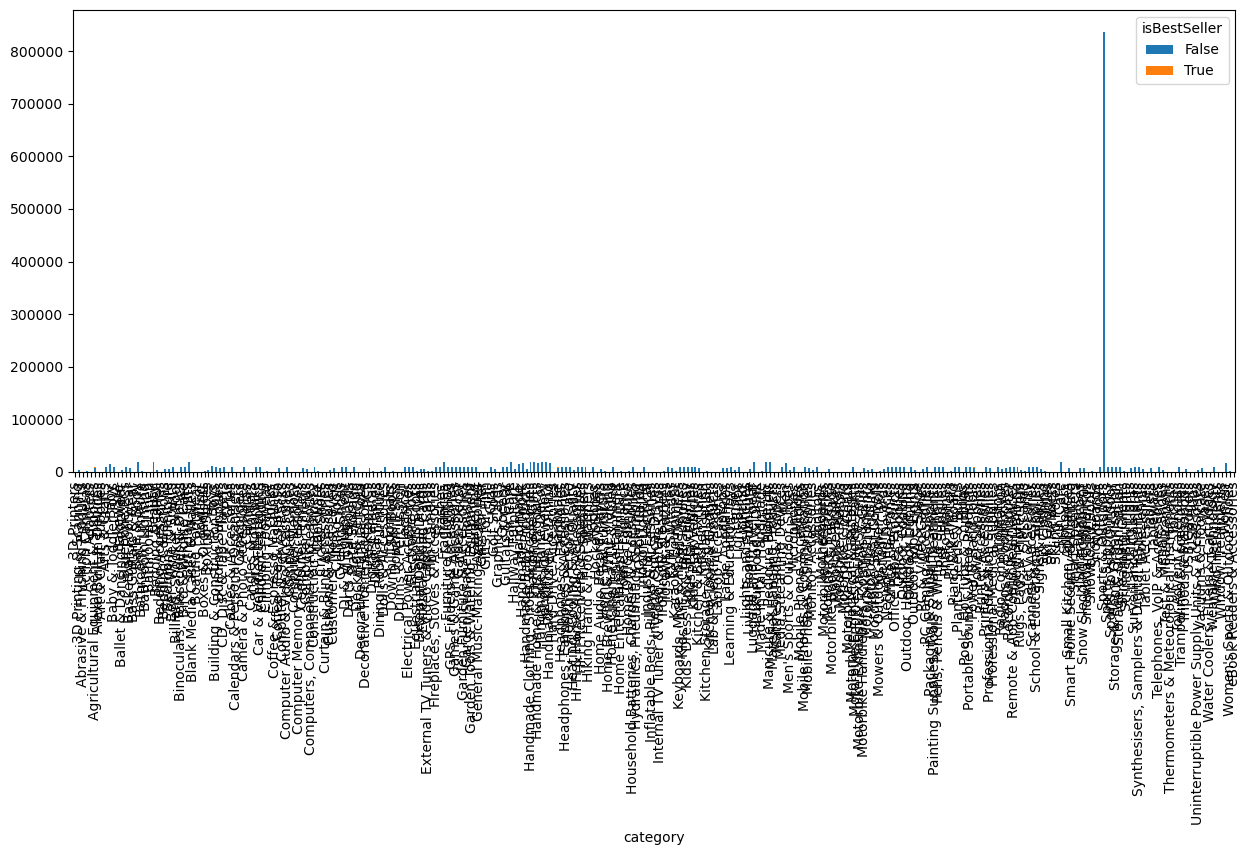

In [49]:
# 3.Visualizations:

#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True, figsize=(15, 6))

In [50]:
# PART 2

In [55]:
#0 Preliminary Step
Q3 = amazon_df['price'].quantile(0.75)
Q1 = amazon_df['price'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

amazon_df = amazon_df[(amazon_df['price'] >= lower_bound) & (amazon_df['price'] <= upper_bound)]
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing


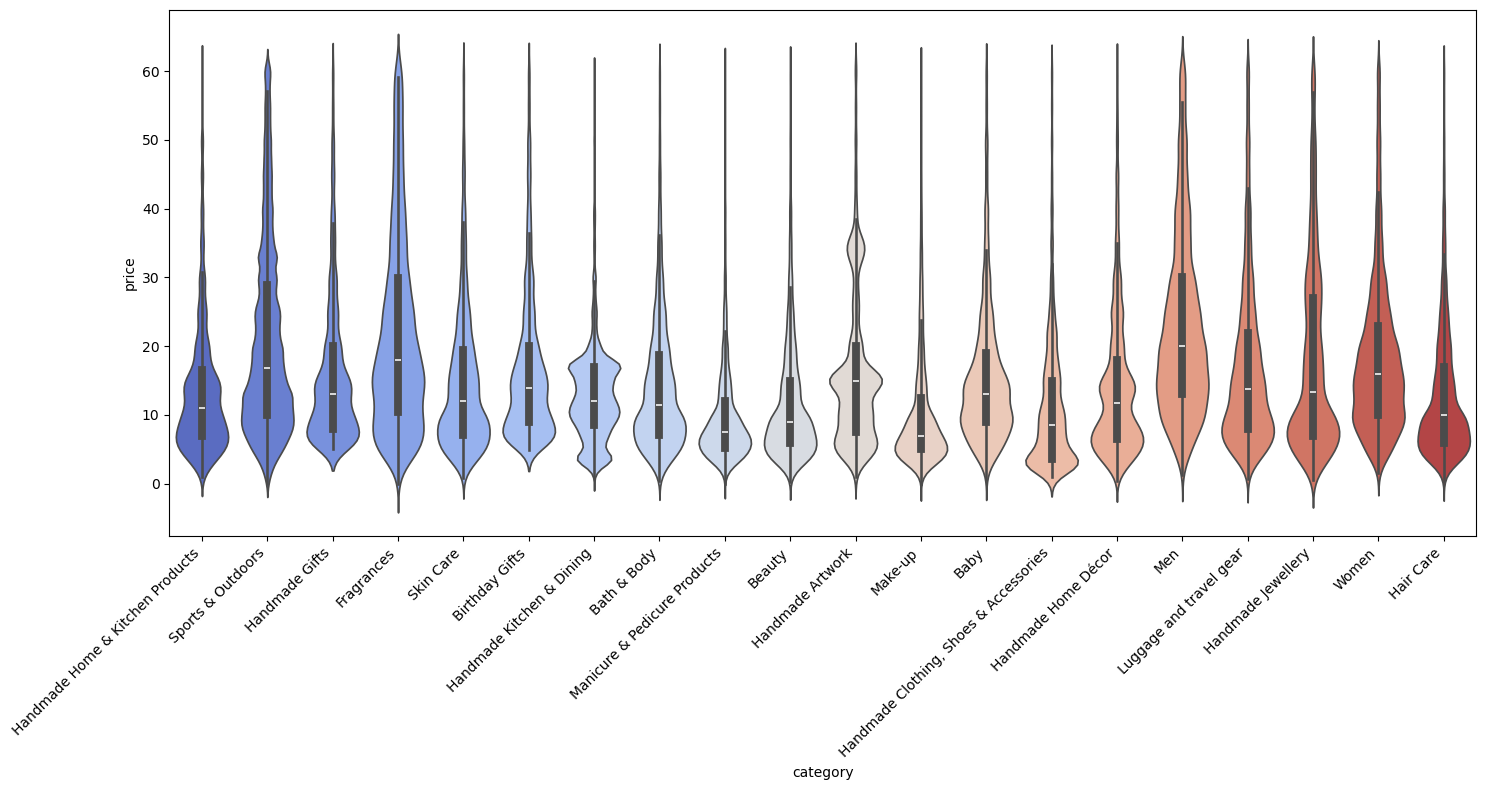

In [56]:
#1 Violin plots
#Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
top_categories = amazon_df['category'].value_counts().nlargest(20).index
amazon_top= amazon_df[amazon_df['category'].isin(top_categories)]

plt.figure(figsize=(15, 8))  
sns.violinplot(data=amazon_top, x='category', y='price', palette="coolwarm", hue='category', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [58]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
amazon_df.groupby("category")["price"].median().sort_values(ascending=False)
#Desktop and PCs

category
Motherboards             52.415
Motorbike Batteries      50.080
Boxing Shoes             48.990
Hockey Shoes             48.810
Streaming Clients        45.990
                          ...  
Adapters                  6.990
Make-up                   6.990
Signs & Plaques           6.985
Arts & Crafts             5.990
Office Paper Products     4.355
Name: price, Length: 296, dtype: float64

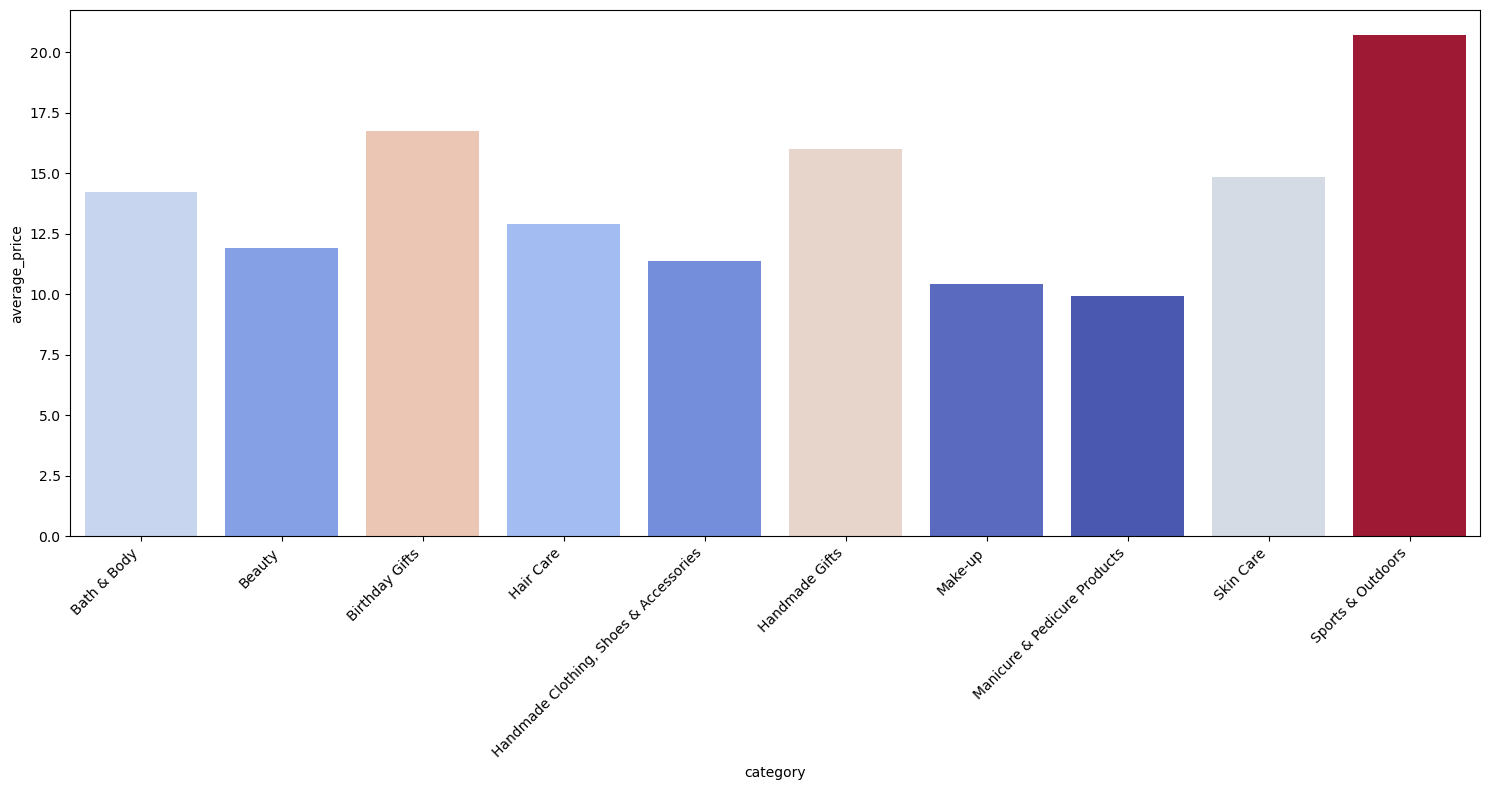

category
Hockey Shoes             46.458710
Motherboards             46.335417
Motorbike Batteries      44.112937
Streaming Clients        43.352871
Computer Cases           42.152621
                           ...    
Bedding Accessories       8.835220
Adapters                  8.519249
Signs & Plaques           8.169886
Arts & Crafts             7.910503
Office Paper Products     6.850959
Name: price, Length: 296, dtype: float64

In [59]:
#2. Bar Charts:

#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top10_categories = amazon_df['category'].value_counts().nlargest(10).index
amazon_top10= amazon_df[amazon_df['category'].isin(top10_categories)]

avg_price = amazon_top10.groupby("category")["price"].mean().reset_index()
avg_price.columns = ["category", "average_price"]

plt.figure(figsize=(15, 8)) 
sns.barplot(data=avg_price, x='category', y='average_price', palette="coolwarm", hue='average_price', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

#Which product category commands the highest average price? Don't filter here by top categories.
amazon_df.groupby("category")["price"].mean().sort_values(ascending=False)
#Highest average price per category (not filtering) is Motherboards

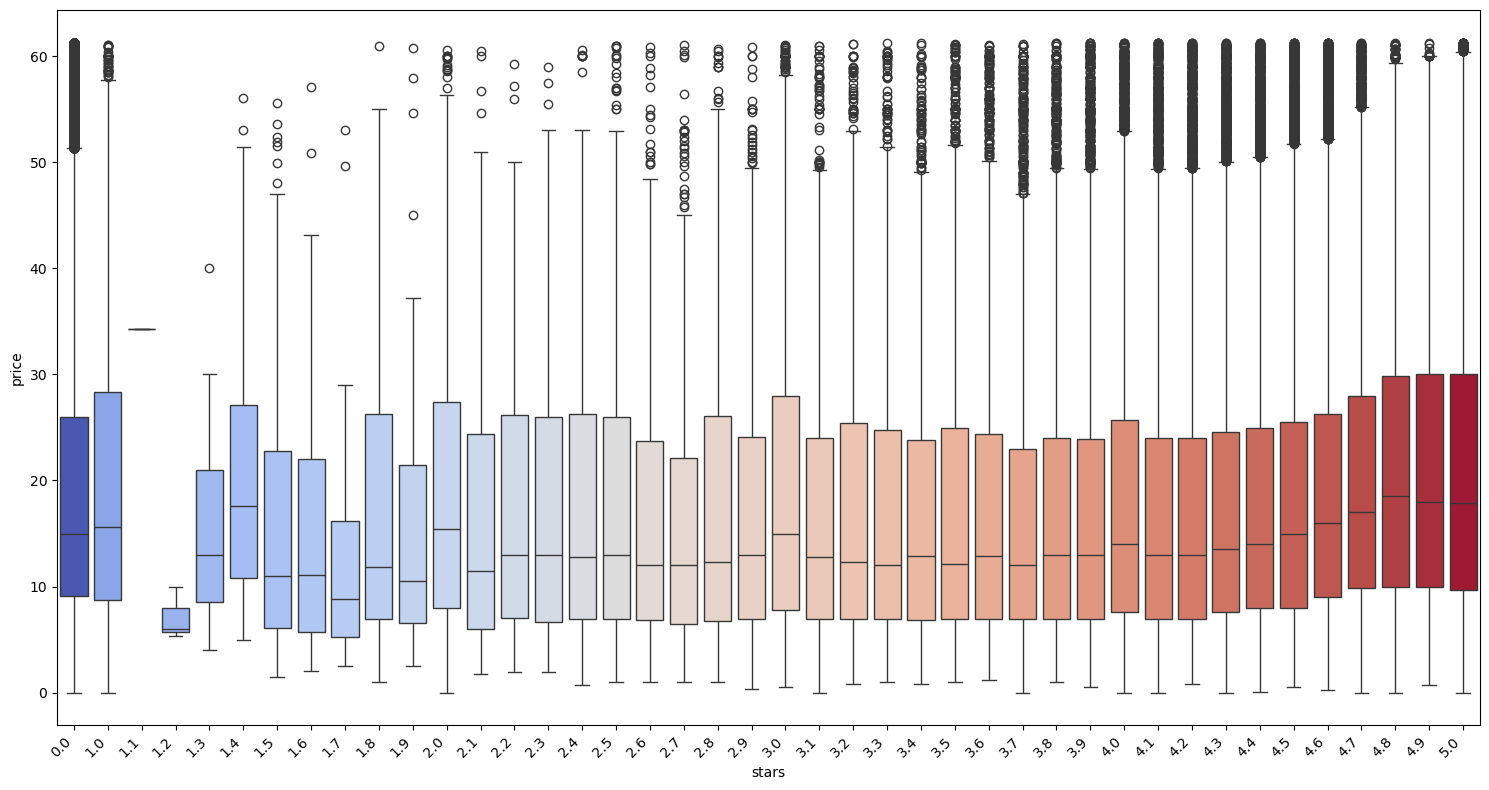

category
Computer Memory                4.7
Beer, Wine & Spirits           4.6
Jigsaws & Puzzles              4.6
Laptop Accessories             4.6
Office Paper Products          4.6
                              ... 
Hi-Fi Receivers & Separates    0.0
Handmade Kitchen & Dining      0.0
Handmade Jewellery             0.0
Handmade Home Décor            0.0
eBook Readers & Accessories    0.0
Name: stars, Length: 296, dtype: float64

In [60]:
# 3. Box Plots:

#Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
plt.figure(figsize=(15, 8)) 
sns.boxplot(data=amazon_top10, x='stars', y='price', palette="coolwarm", hue='stars', legend=False)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
amazon_df.groupby("category")["stars"].median().sort_values(ascending=False)
# The category that tends to recieve higher median rating is Computer memory

In [61]:
# PART 3
#1. Correlation Coefficients:

#Calculate the correlation coefficient between price and stars.
correlation = amazon_df['stars'].corr(amazon_df['price'])
correlation

#Is there a significant correlation between product price and its rating?
#No there is a low negative correlation (-0,07767)

np.float64(-0.06315142602290025)

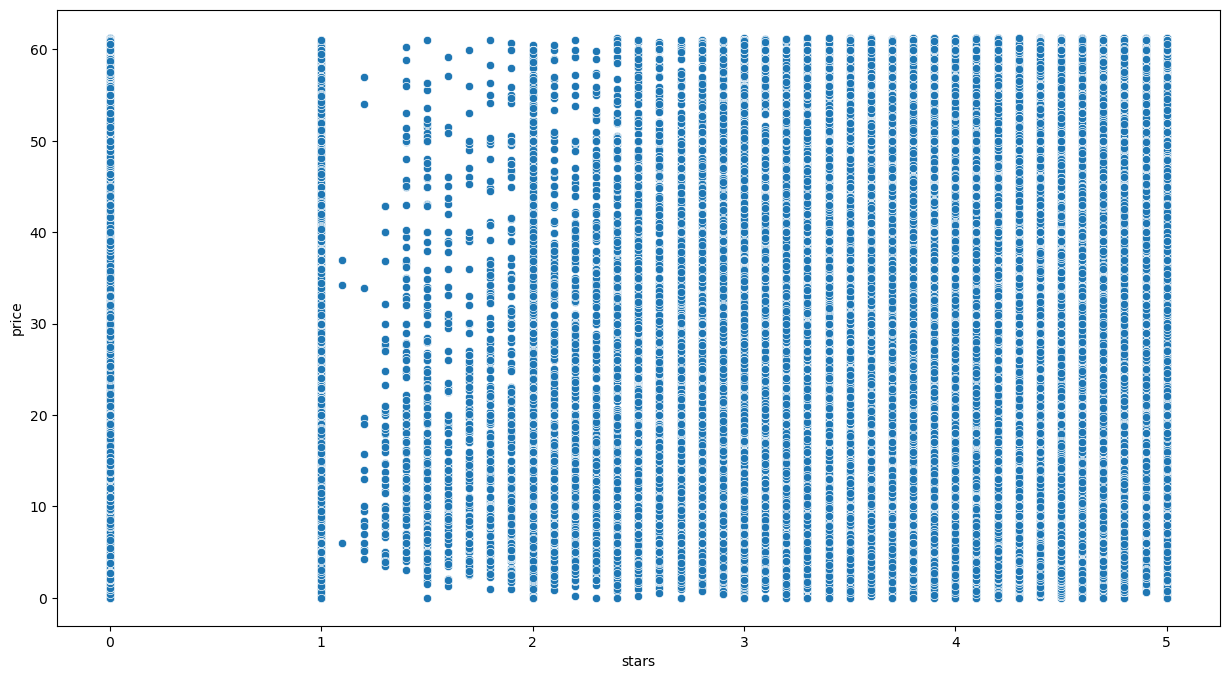

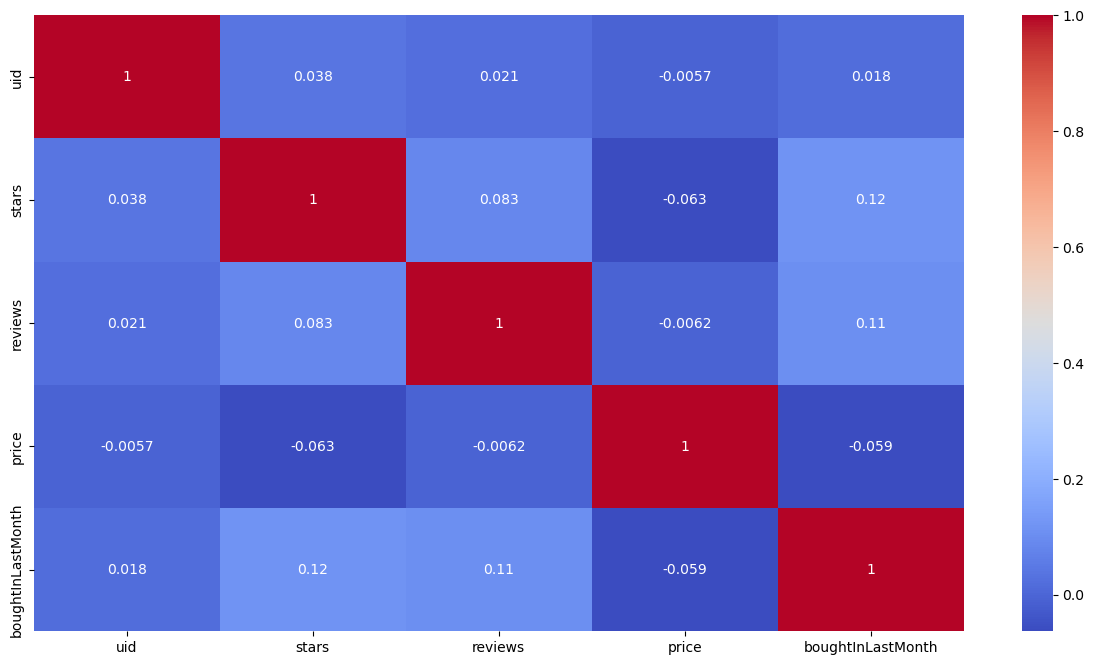

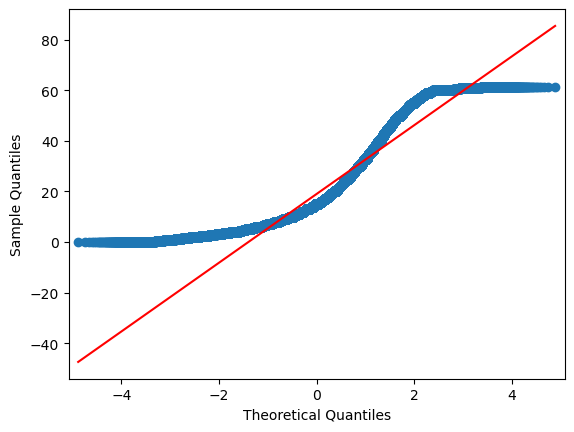

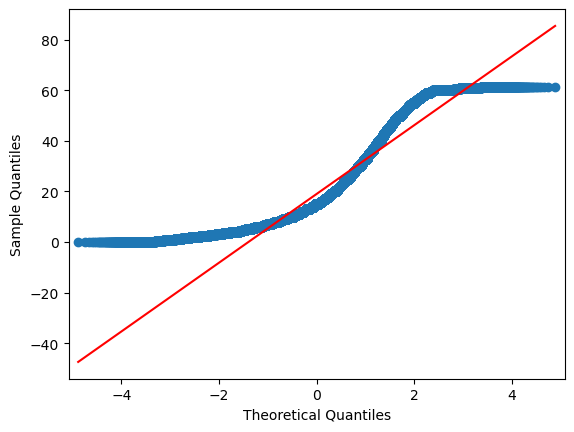

In [63]:
# 2. Visualizations:

#Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
plt.figure(figsize=(15, 8)) 
sns.scatterplot(data=amazon_df, x='stars', y='price')
plt.show()
#There are not a clear patern. Independently of the price there can get any rating (there are no 0,xxx values)

#Use a correlation heatmap to visualize correlations between all numerical variables.
df_numerical = amazon_df.select_dtypes("number")
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
 
sm.qqplot(amazon_df['price'], line='s')
#No they don't follow a normal distribution as it deviates for the red line